<a href="https://colab.research.google.com/github/linmariaso/colab-codes/blob/main/Seminar8_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X = iris.data[:, :2]
y = iris.target

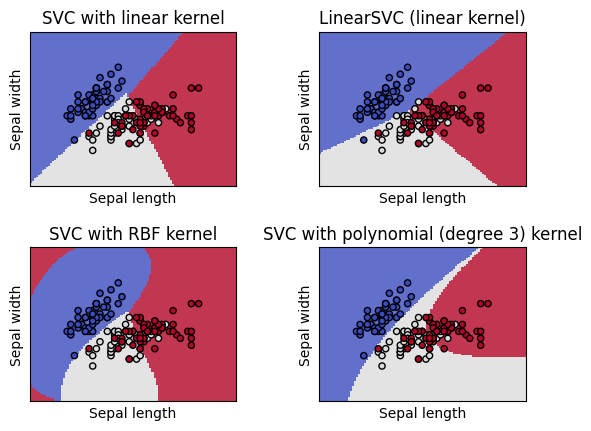

In [ ]:
models = (
    svm.SVC(kernel='linear', C=1),
    svm.LinearSVC(C=1, max_iter=10000),
    svm.SVC(kernel='rbf', gamma=0.7, C=1),
    svm.SVC(kernel='poly', degree=3, gamma='auto', C=1)
)

models = (clf.fit(X, y) for clf in models)

titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

fig, subplt = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, subplt.flatten()):
  disp = DecisionBoundaryDisplay.from_estimator(
      clf,
      X,
      response_method="predict",
      cmap=plt.cm.coolwarm,
      alpha=0.8,
      ax=ax,
      xlabel="Sepal length",
      ylabel="Sepal width",
      plot_method="pcolormesh",
  )
  ax.scatter(X0,X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(title)
plt.show()

KNN

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
data_iris = load_iris(as_frame=True)
data_iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [ ]:
X = data_iris.data[["sepal length (cm)","sepal width (cm)"]]
y = data_iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=11))
])

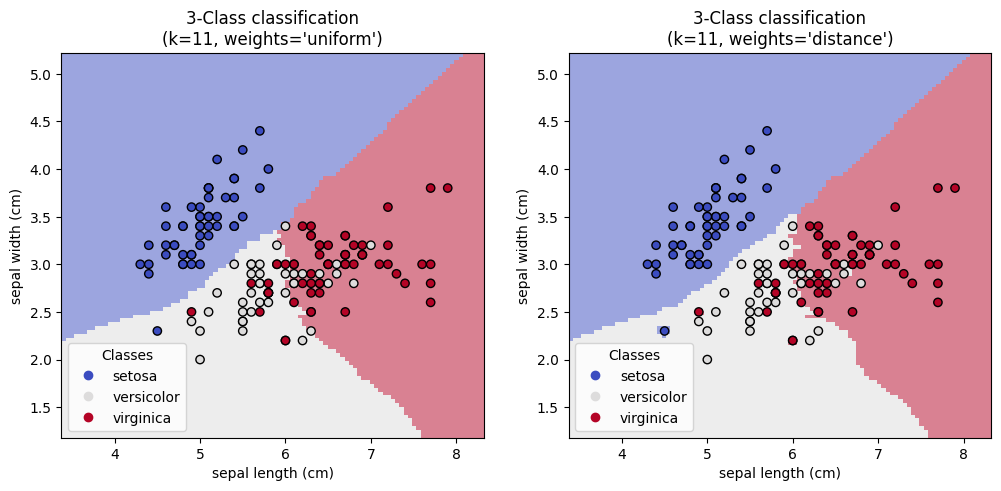

In [ ]:
_, axs = plt.subplots(ncols= 2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
  clf.set_params(knn__weights=weights).fit(X_train, y_train)
  disp = DecisionBoundaryDisplay.from_estimator(
      clf,
      X_test,
      response_method="predict",
      plot_method="pcolormesh",
      xlabel="sepal length (cm)",
      ylabel="sepal width (cm)",
      shading="auto",
      cmap=plt.cm.coolwarm,
      alpha=0.5,
      ax=ax,
  )
  scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
  disp.ax_.legend(
      scatter.legend_elements()[0],
      data_iris.target_names,
      loc="lower left",
      title="Classes",
  )
  _ = disp.ax_.set_title(
      f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
      )
plt.show()